# Mathematical Transform

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy.stats as stats

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df2=pd.read_csv('csv/train.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df=pd.read_csv('csv/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
df.shape

(891, 3)

In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

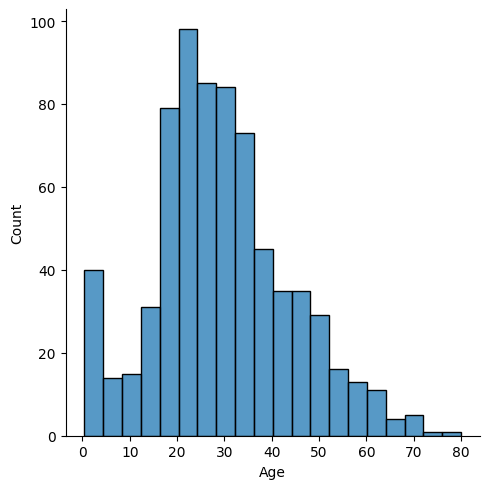

In [10]:
sns.displot(df['Age'])

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\moury\AppData\Local\Temp\ipykernel_11912\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

C:\Users\moury\AppData\Local\Temp\ipykernel_11912\3684225530.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\moury\AppData\Local\Temp\ipykernel_11912\3684225530.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


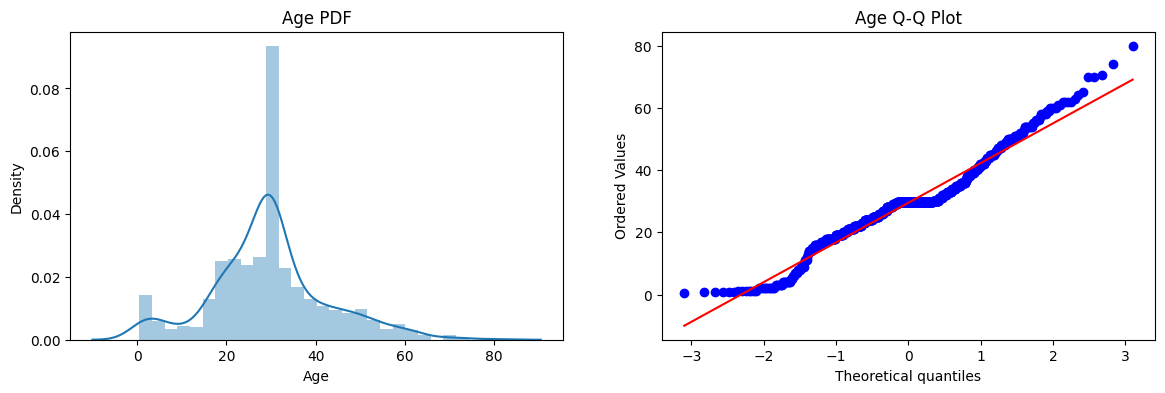

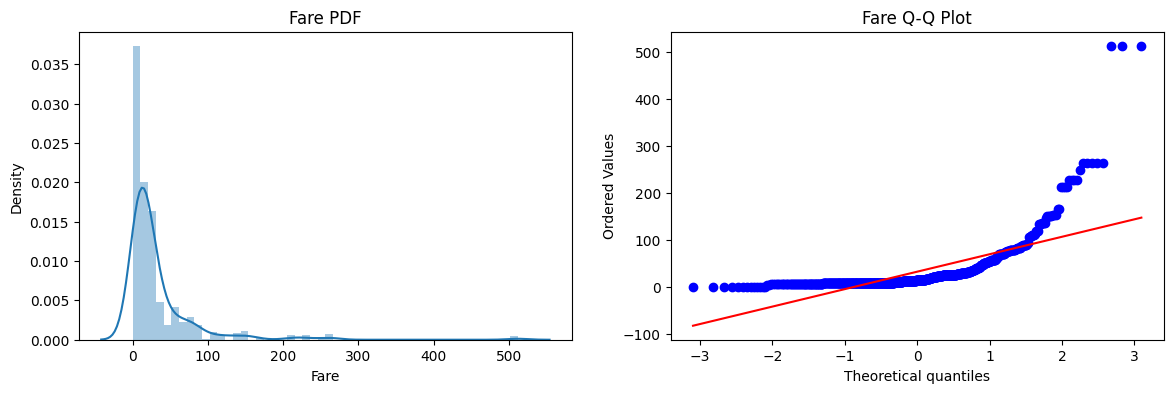

In [14]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(f'{col} PDF')

    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(f'{col} Q-Q Plot')

In [15]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print("accuracy of score LR",accuracy_score(y_test,y_pred))
print("accuracy of score DT",accuracy_score(y_test,y_pred1))

accuracy of score LR 0.6480446927374302
accuracy of score DT 0.664804469273743


In [17]:
trf=FunctionTransformer(func=np.log1p)

In [18]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [19]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred=clf.predict(x_test_transformed)
y_pred1=clf2.predict(x_test_transformed)

print("accuracy of score LR",accuracy_score(y_test,y_pred))
print("accuracy of score DT",accuracy_score(y_test,y_pred1))

accuracy of score LR 0.6815642458100558
accuracy of score DT 0.6927374301675978


C:\Users\moury\AppData\Local\Temp\ipykernel_11912\850396237.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\moury\AppData\Local\Temp\ipykernel_11912\850396237.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\moury\AppData\Local\Temp\ipykernel_

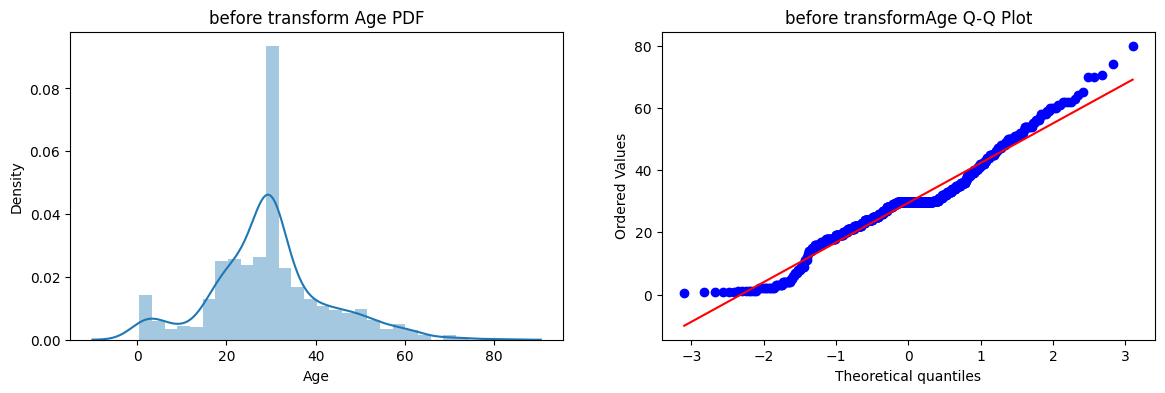

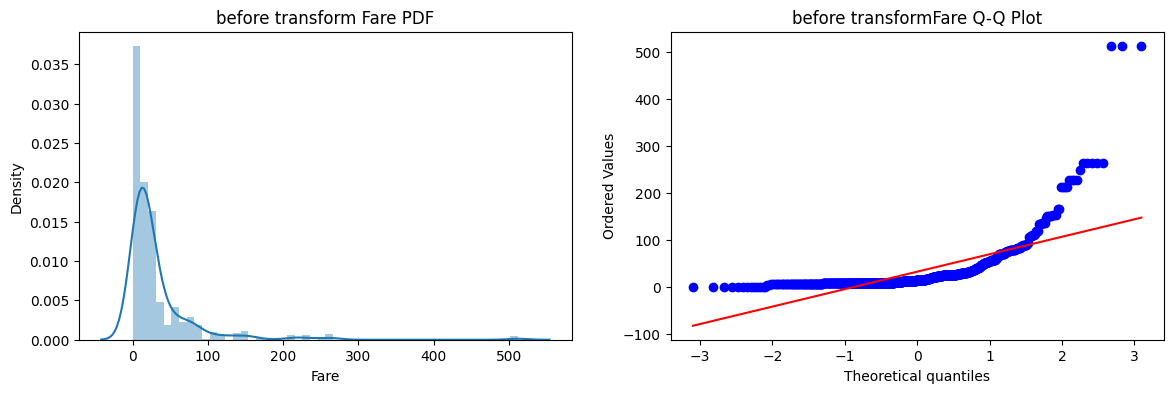

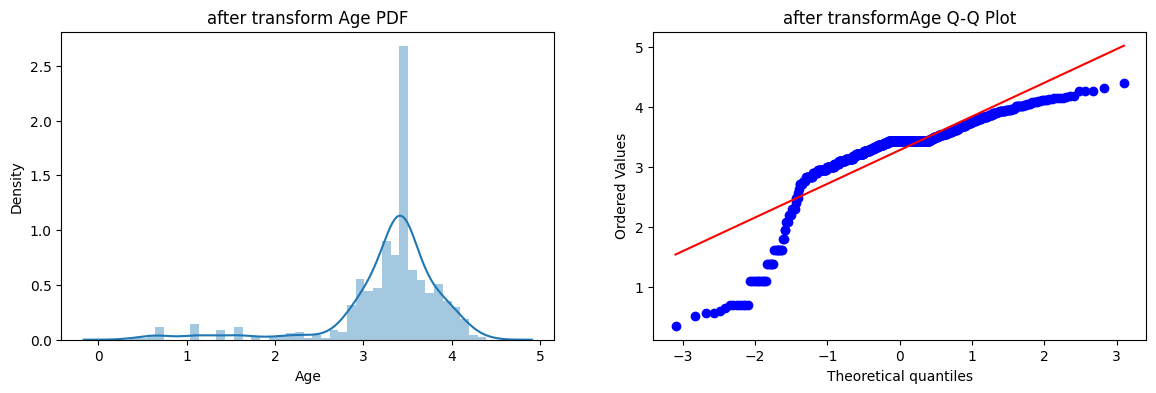

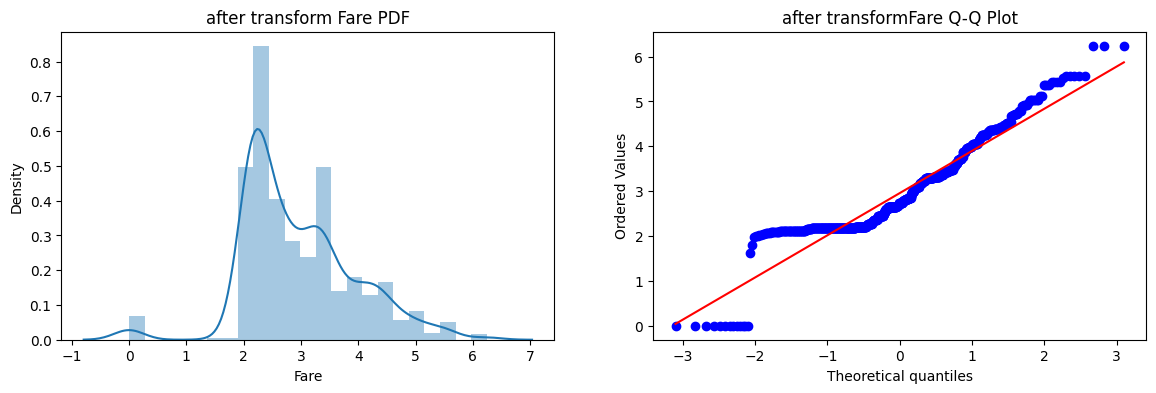

In [20]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(f'before transform {col} PDF')

    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(f'before transform{col} Q-Q Plot')
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train_transformed[col])
    plt.title(f'after transform {col} PDF')

    plt.subplot(122)
    stats.probplot(x_train_transformed[col],dist="norm",plot=plt)
    plt.title(f'after transform{col} Q-Q Plot')

In [21]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [22]:
x_transformed2=trf2.fit_transform(df.drop(columns=['Survived']))

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,df['Survived'],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,df['Survived'],scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588264669163546


In [23]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6431335830212235


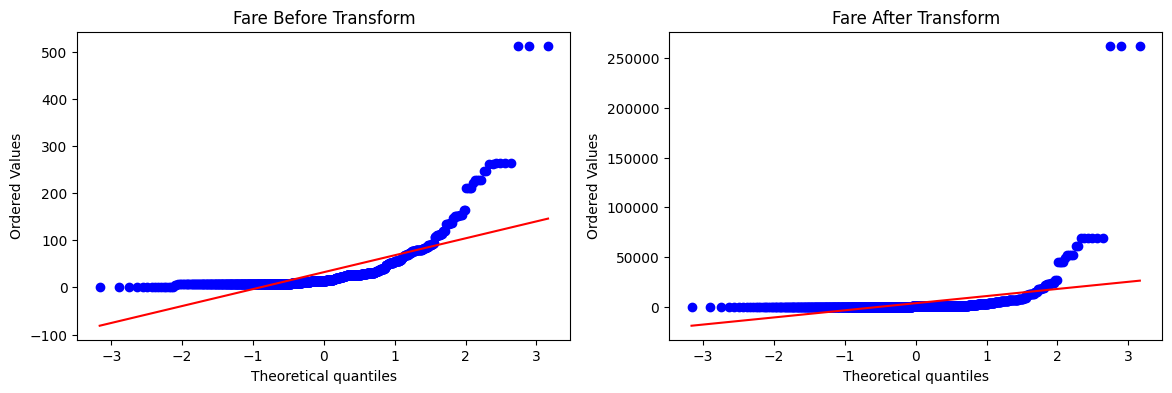

In [24]:
apply_transform(lambda x: x**2)